# Metro Bike Share -- Time Series Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning data
#### 3. Decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing data

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Define path
path= r'C:\Users\ashan\OneDrive\桌面\Data Analytic\Metro Bike Share'

# Import data of 2023
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','Cleaned_2023.csv'),index_col = 0)

In [3]:
# Import data from 2019 t0 2022
# 2019
df2 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2019-q1.csv'))
df3 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2019-q2.csv'))
df4 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2019-q3.csv'))
df5 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2019-q4.csv'))

# 2020
df6 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2020-q1.csv'))
df7 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2020-q2.csv'))
df8 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2020-q3.csv'))
df9 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2020-q4.csv'))

#2021
df10 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2021-q1.csv'))
df11 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2021-q2.csv'))
df12 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2021-q3.csv'))
df13 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2021-q4.csv'))

# 2022
df14 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2022-q1.csv'))
df15 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2022-q2.csv'))
df16 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2022-q3.csv'))
df17 = pd.read_csv(os.path.join(path,'02 Data','Original Data','metro-trips-2019-2022','cleaned-2022-q4.csv'))

Concat data from year 2019 to 2022

In [4]:
frames = [df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]
df_concat = pd.concat(frames)

print(df_concat)

           trip_id  duration        start_time          end_time
0      112536773.0       7.0     1/1/2019 0:07     1/1/2019 0:14
1      112536772.0       6.0     1/1/2019 0:08     1/1/2019 0:14
2      112538689.0      32.0     1/1/2019 0:18     1/1/2019 0:50
3      112538688.0      30.0     1/1/2019 0:20     1/1/2019 0:50
4      112538687.0      28.0     1/1/2019 0:22     1/1/2019 0:50
...            ...       ...               ...               ...
78712  231772762.0      15.0  12/31/2022 22:14  12/31/2022 22:29
78713  231773363.0      27.0  12/31/2022 22:32  12/31/2022 22:59
78714  231773162.0      10.0  12/31/2022 22:38  12/31/2022 22:48
78715  231780463.0       4.0  12/31/2022 23:52  12/31/2022 23:56
78716  231780462.0       4.0  12/31/2022 23:52  12/31/2022 23:56

[993453 rows x 4 columns]


In [5]:
df_concat.shape

(993453, 4)

Data from year 2023

In [6]:
df.head()

,trip_id,duration,fare_without_discount,start_time,month,day_of_month,time_of_start,day_of_week,end_time,start_station,...,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,fare,subscription
0,231787362,9,1.75,1/1/2023 0:41,1,1,0,1,1/1/2023 0:50,4204,...,4210,33.984341,-118.471550,23373,30,One Way,Monthly Pass,electric,0.00,17
1,231801471,97,7.00,1/1/2023 1:05,1,1,1,1,1/1/2023 2:42,3054,...,3054,34.039219,-118.236488,13870,1,Round Trip,Walk-up,standard,7.00,0
2,231794062,15,1.75,1/1/2023 1:11,1,1,1,1,1/1/2023 1:26,3037,...,3068,34.053200,-118.250954,23942,1,One Way,Walk-up,electric,2.75,0
3,231794664,26,1.75,1/1/2023 1:31,1,1,1,1,1/1/2023 1:57,3063,...,4454,34.017899,-118.291718,22873,1,One Way,Walk-up,electric,2.75,0
4,231794562,8,1.75,1/1/2023 1:44,1,1,1,1,1/1/2023 1:52,3066,...,3026,34.063179,-118.245880,14790,1,One Way,Walk-up,standard,1.75,0


In [7]:
df.columns  

Index(['trip_id', 'duration', 'fare_without_discount', 'start_time', 'month',
       'day_of_month', 'time_of_start', 'day_of_week', 'end_time',
       'start_station', 'start_lat', 'start_lon', 'end_station', 'end_lat',
       'end_lon', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'bike_type', 'fare', 'subscription'],
      dtype='object')

In [8]:
df.shape

(433658, 22)

### 2. Subsetting, wrangling, and cleaning data

Subsetting data

In [9]:
# Subset coloumns bike trip_id and trip start_time

data_19to22 = df_concat[['trip_id', 'start_time']]  # trip of 2019 to 2022
data_23 = df[['trip_id','start_time']]

In [10]:
# concate 2023 with 2019 -2022

fra = [data_19to22, data_23]
data_all = pd.concat(fra)

In [11]:
data_all.shape  # The number of rows matches with all data sets sum up.

(1427111, 2)

In [12]:
print(data_all)

            trip_id        start_time
0       112536773.0     1/1/2019 0:07
1       112536772.0     1/1/2019 0:08
2       112538689.0     1/1/2019 0:18
3       112538688.0     1/1/2019 0:20
4       112538687.0     1/1/2019 0:22
...             ...               ...
126689  341807229.0  12/31/2023 23:38
126690  341807288.0  12/31/2023 23:40
126691  341816974.0  12/31/2023 23:53
126692  341816956.0  12/31/2023 23:54
126693  341816965.0  12/31/2023 23:55

[1427111 rows x 2 columns]


Data wrangling

In [13]:
data_all['start_time'].dtypes

dtype('O')

In [14]:
# Change data type of column'start_time' 
data_all['start_time'] = pd.to_datetime(data_all['start_time'])

In [15]:
# Seperatie date and time of bike trip
data_all['date'] = data_all['start_time'].dt.date
data_all['time'] = data_all['start_time'].dt.time

In [16]:
# Drop the time of bike trip
data_all.drop(['start_time', 'time'], axis=1, inplace=True)

In [17]:
data_all.head

<bound method NDFrame.head of             trip_id        date
0       112536773.0  2019-01-01
1       112536772.0  2019-01-01
2       112538689.0  2019-01-01
3       112538688.0  2019-01-01
4       112538687.0  2019-01-01
...             ...         ...
126689  341807229.0  2023-12-31
126690  341807288.0  2023-12-31
126691  341816974.0  2023-12-31
126692  341816956.0  2023-12-31
126693  341816965.0  2023-12-31

[1427111 rows x 2 columns]>

In [18]:
# Group by 'date' and count the 'trip_id'
trip_counts_by_date = data_all.groupby('date')['trip_id'].count().reset_index(name='trip_count')


In [19]:
trip_counts_by_date

,date,trip_count
0,2019-01-01,503
1,2019-01-02,667
2,2019-01-03,727
3,2019-01-04,798
4,2019-01-05,278
...,...,...
1821,2023-12-27,1196
1822,2023-12-28,1204
1823,2023-12-29,1235
1824,2023-12-30,996


In [20]:
trip_counts_by_date.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'trip_date.csv'))

In [21]:
data_sub = trip_counts_by_date.set_index('date')

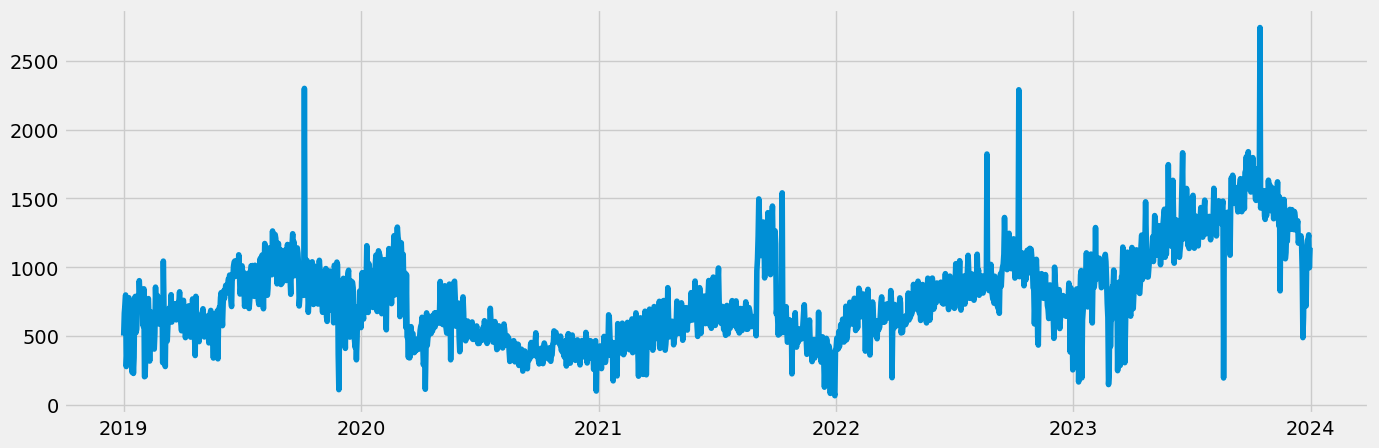

In [22]:
# Plot the bike trip data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [23]:
data_sub.isnull().sum() 

trip_count    0
dtype: int64

In [24]:
dups = data_sub.duplicated()
dups.sum()

# Keep duplicates as the date of trip are differnt.

905

### 3. Decomposition

In [25]:
# Assuming your data is in a pandas Series 'data_sub' with a proper datetime index
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=365)

In [26]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

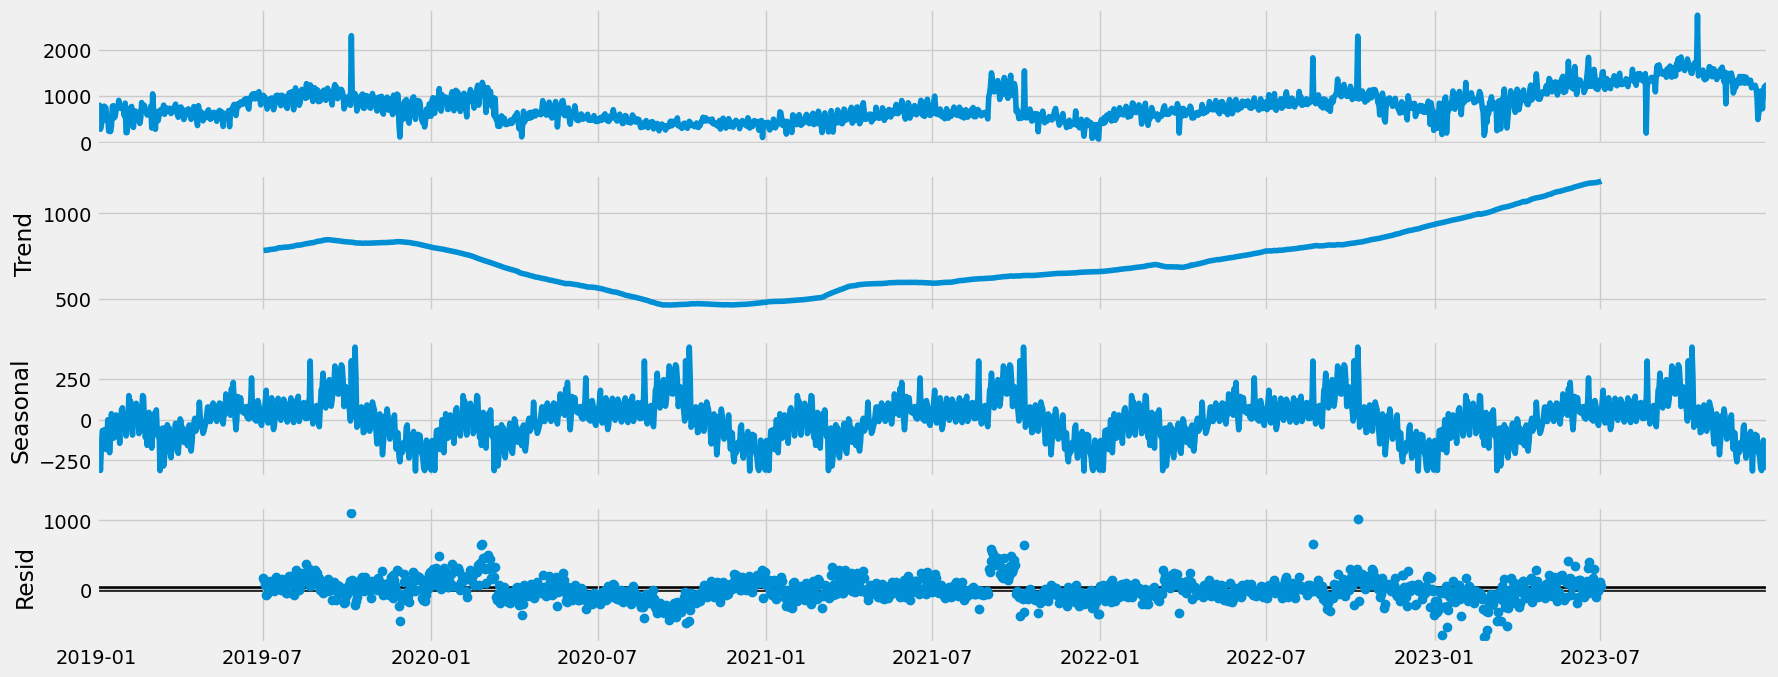

In [27]:
# Plot the separate components
decomposition.plot()
plt.show()

In decomposition plots of daily bike trips count, data first trended downwards for the first 6 months of 2020, then reached the lowest points aroun 2020-08. After 2021-03, bike trips count started going up and gradully uptick till 2023-07. The trending matches the timeline of the COVID pandemic activities restriction in California. And the bike trip activity level now already surpassed pre covid level.

* Level: Data trend is ralatively stable. The fluctuations are mild, and there are few outliners.


* Trend: The data was trending downwards, then reached the lowest point at 2020-08. Data gradully uptick from 2021-02 till 2023-07.

* Seasonal: Data shows a specific pattern throughout a year period. Data usually start from a lower point from January. There are a little hill from January to March. April is the 2nd lower point then start going up. It reaches the peak around September, and early October. Then the data going down to the 3rd lower point in December and January.

* Resid: The lowest point of data occured around 2020-08 which was becasue Covid lockdown. A group of outliers occured around 2021-08, and some extreme lower pionts occured around 2023-01.

### 4. Testing for stationarity

In [28]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['trip_count'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.210871
p-value                           0.202324
Number of Lags Used              22.000000
Number of Observations Used    1803.000000
Critical Value (1%)              -3.433982
Critical Value (5%)              -2.863144
Critical Value (10%)             -2.567624
dtype: float64


The analysis of this dataset aim to discover the pattern of bike trip count with historical data, and then predict the number of bike trips in the future. The null hypothesis is that the bike trips count data has a unit root. So the alternative hypothesis is that there's no unit root in the bike trips count data.

According to Dickey-Fuller Stationarity test, the test statistic is -2.21, which is larger than the criical value (1%) -3.43 and the critical value (5%) -2.86. Thus the null hypothesis can not be rejected.

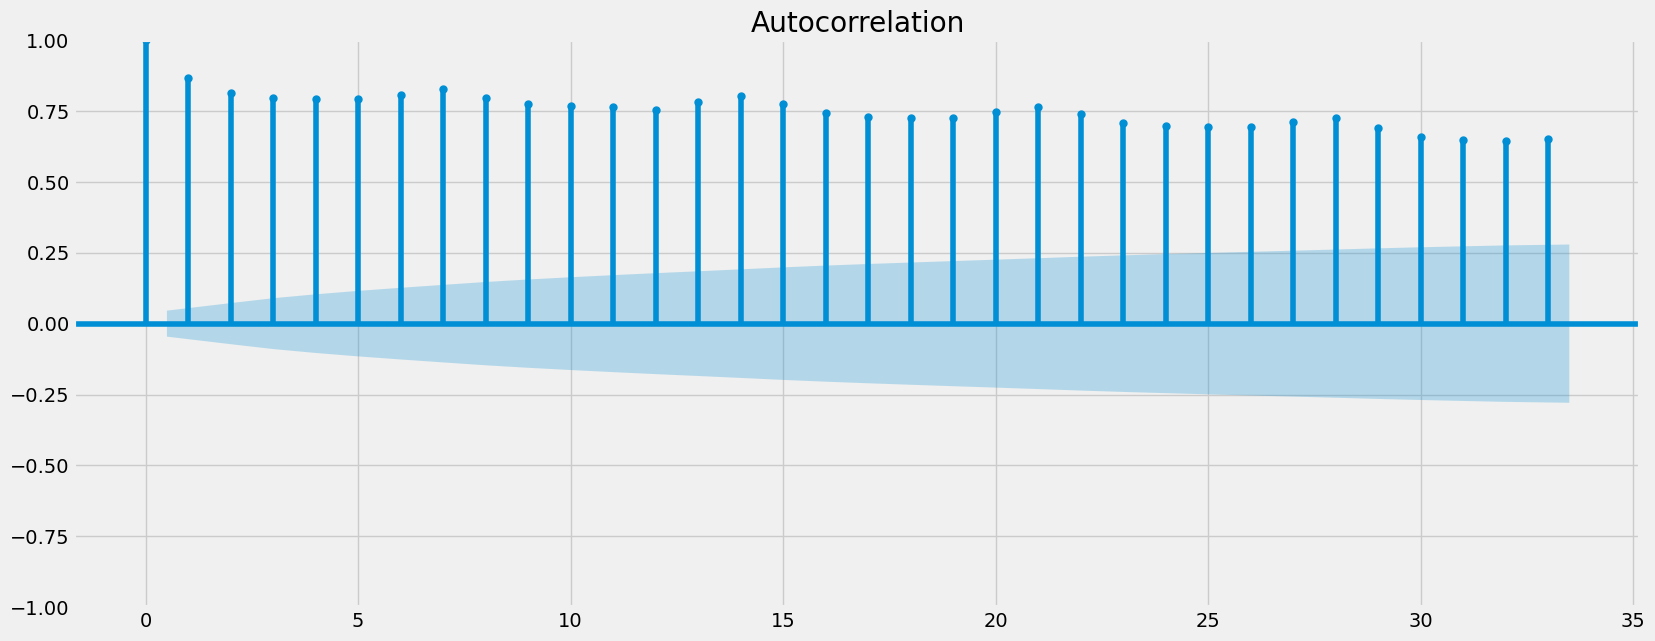

In [29]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### 5. Stationarizing data

###### 1st differencing

In [30]:
# Set t = t-1
data_diff = data_sub - data_sub.shift(1) 

In [31]:
# Drop null value
data_diff.dropna(inplace = True)

In [32]:
data_diff.head()

,trip_count
date,
2019-01-02,164.0
2019-01-03,60.0
2019-01-04,71.0
2019-01-05,-520.0
2019-01-06,96.0


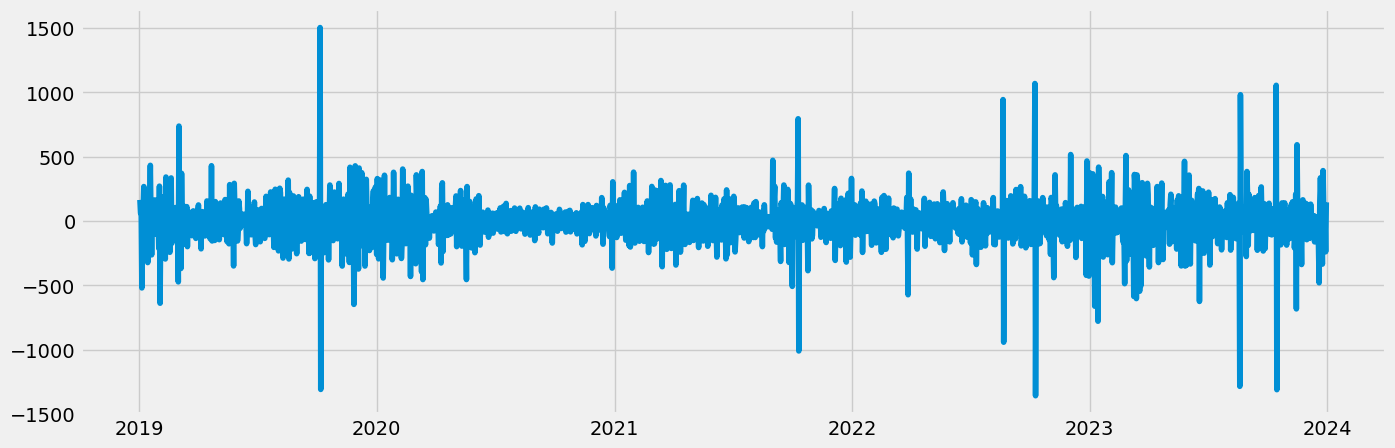

In [33]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [34]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.098024e+01
p-value                        7.490624e-20
Number of Lags Used            2.100000e+01
Number of Observations Used    1.803000e+03
Critical Value (1%)           -3.433982e+00
Critical Value (5%)           -2.863144e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


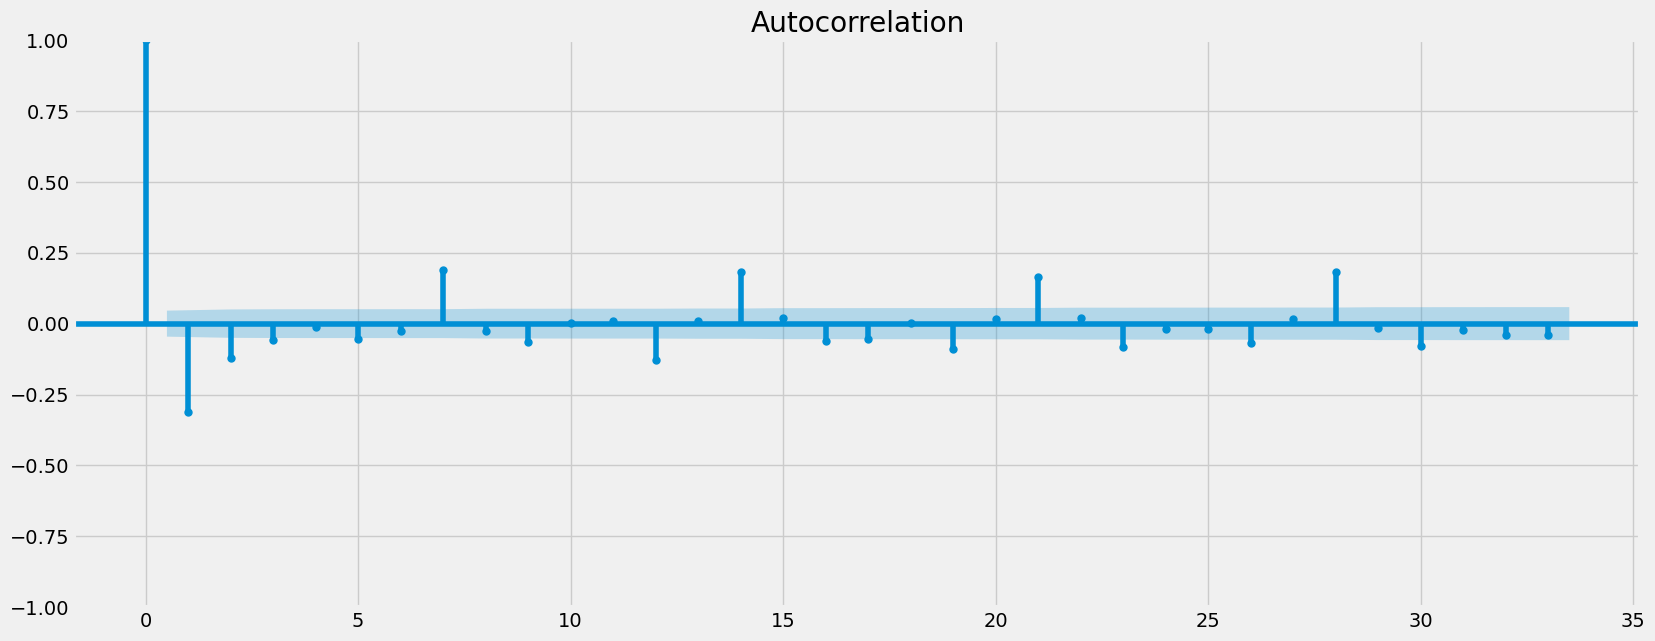

In [35]:
plot_acf(data_diff)
plt.show()

After 1st time differencing, the test statistic -1.10 is still larger the critical value (1%) -3.43, and critical value (5%) -2.86. The null hypothesis can not be rejected.

###### 2nd differencing

In [36]:
data_diff_2 = data_sub.diff().diff()

In [37]:
# Drop null value
data_diff_2.dropna(inplace = True)

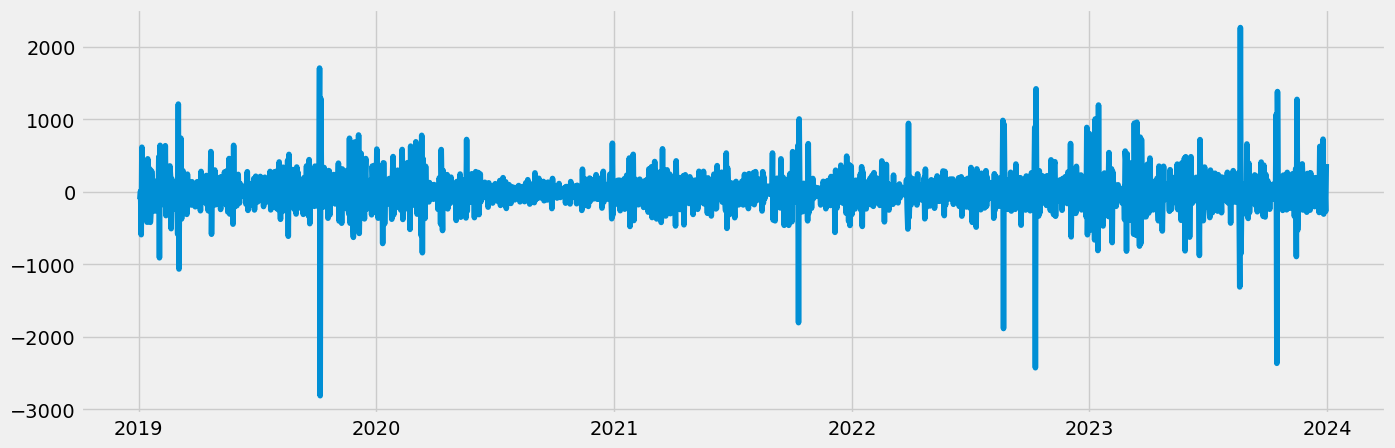

In [38]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [39]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.801719e+01
p-value                        2.702591e-30
Number of Lags Used            2.300000e+01
Number of Observations Used    1.800000e+03
Critical Value (1%)           -3.433988e+00
Critical Value (5%)           -2.863147e+00
Critical Value (10%)          -2.567626e+00
dtype: float64


After 2nd time differencing, the test statistic -1.80 is still larger the critical value (1%) -3.43, and critical value (5%) -2.86. The null hypothesis can not be rejected.

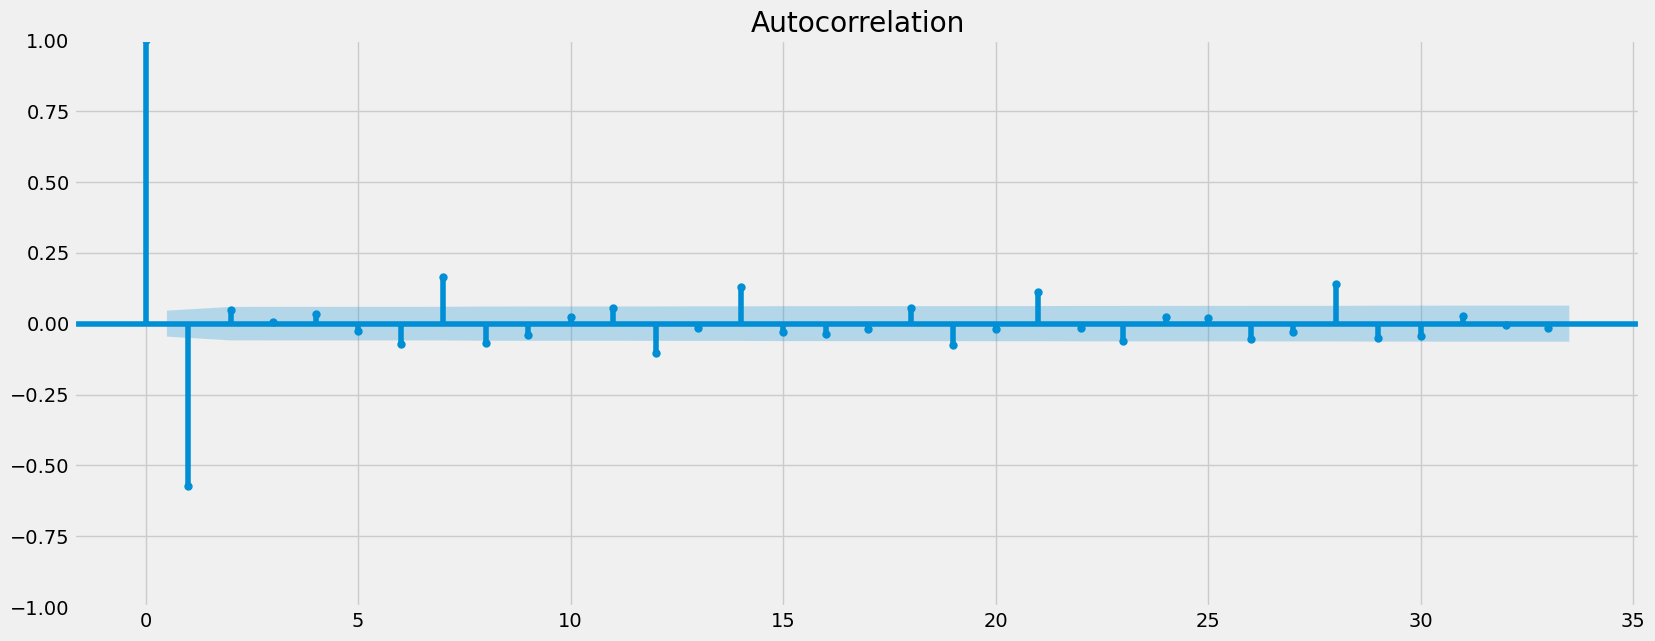

In [40]:
plot_acf(data_diff_2)
plt.show()

##### Conclusion

Althought there are fewer autocorrelated terms after the 2nd differencing, the dickey_fuller testing indicates that the data is still not stationary. Different stationarizing techniques should be exploited or, the nature of data itself has unit root so that it can not be utilized to train the model for prediction. 